In [91]:
import pandas as pd
import numpy as np

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot

In [93]:
x_train = pd.read_csv("adult_train2.csv")
x_test = pd.read_csv("adult_test2.csv")

# 刪除特徵前

In [94]:
x_train_feature = x_train.drop(labels=['hours-per-week'],axis=1)
y_train_class = x_train['hours-per-week'].values
#'education','marital-status','race','sex','native-country','Class'

In [95]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train_feature)
x_scaled = scaler.transform(x_train_feature)
x_train_final=pd.DataFrame(x_scaled,columns=x_train_feature.columns)
x_train_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Class
0,0.301370,0.833333,0.043338,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.95,1.0
1,0.452055,0.666667,0.047277,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.95,1.0
2,0.287671,0.333333,0.137244,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.95,1.0
3,0.493151,0.333333,0.150212,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.95,1.0
4,0.150685,0.333333,0.220703,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.95,1.0
30158,0.315068,0.333333,0.095589,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.95,0.0
30159,0.561644,0.333333,0.093914,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.95,1.0
30160,0.068493,0.333333,0.127620,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.95,1.0


In [96]:
x_test_feature = x_test.drop(labels=['hours-per-week'],axis=1)
y_test_class = x_test['hours-per-week'].values

In [97]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_test_feature)
x_scaled = scaler.transform(x_test_feature)
x_test_final=pd.DataFrame(x_scaled,columns=x_test_feature.columns)
x_test_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Class
0,0.109589,0.333333,0.144430,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.948718,1.0
1,0.287671,0.333333,0.051677,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.948718,1.0
2,0.150685,0.166667,0.219011,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.948718,0.0
3,0.369863,0.333333,0.099418,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.948718,0.0
4,0.232877,0.333333,0.125398,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.948718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.156895,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.948718,1.0
15056,0.301370,0.333333,0.136723,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.948718,1.0
15057,0.287671,0.333333,0.244762,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.948718,1.0
15058,0.369863,0.333333,0.047666,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.948718,1.0


In [98]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=10, bootstrap = True,random_state=42)
clf.fit(x_train_final, y_train_class)
y_pred = clf.predict(x_test_final)

In [99]:
print('特徵重要程度: ',clf.feature_importances_)

特徵重要程度:  [0.42090337 0.06100236 0.10119715 0.03879504 0.04991292 0.01628903
 0.07250255 0.03555194 0.01100302 0.10492982 0.0166346  0.01150383
 0.01195043 0.04782395]


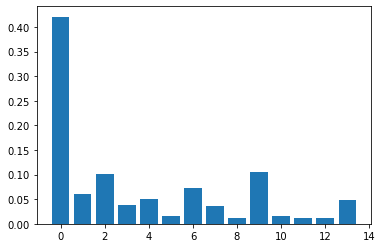

In [100]:
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

<AxesSubplot:>

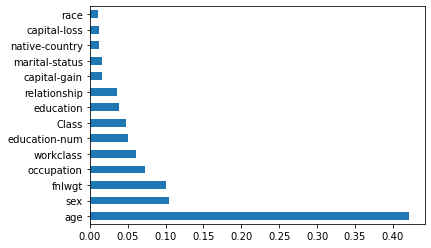

In [101]:
(pd.Series(clf.feature_importances_, index=x_test_final.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [102]:
print('MAE: ',mean_absolute_error(y_test_class,y_pred))

MAE:  6.9523342223453595


In [103]:
print('MAPE:',mean_absolute_percentage_error(y_test_class,y_pred))

MAPE: 0.2783062892077389


In [104]:
print('RMSE:',mean_squared_error(y_test_class,y_pred,squared=False))

RMSE: 10.205621349209261


# 刪除重要特徵

In [106]:
x_train_feature2 = x_train_final.drop(labels=['age','sex','fnlwgt'],axis=1)
y_train_class2 = x_train['hours-per-week'].values

In [107]:
x_test_feature2 = x_test_final.drop(labels=['age','sex','fnlwgt'],axis=1)
y_test_class2 = x_test['hours-per-week'].values

In [108]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=10, bootstrap = True,random_state=42)
clf.fit(x_train_feature2, y_train_class2)
y_pred = clf.predict(x_test_feature2 )

In [109]:
print('MAE: ',mean_absolute_error(y_test_class2,y_pred))

MAE:  7.14269793289078


In [110]:
print('MAPE:',mean_absolute_percentage_error(y_test_class2,y_pred))

MAPE: 0.3015641312886339


In [111]:
print('RMSE:',mean_squared_error(y_test_class2,y_pred,squared=False))

RMSE: 10.600500013118708


# 刪除不重要特徵

In [119]:
x_train_feature3 = x_train_feature.drop(labels=['native-country','capital-loss','race'],axis=1)
y_train_class3 = x_train['hours-per-week'].values

In [120]:
x_test_feature3 = x_test_feature.drop(labels=['native-country','capital-loss','race'],axis=1)
y_test_class3 = x_test['hours-per-week'].values

In [121]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=10, bootstrap = True,random_state=42)
clf.fit(x_train_feature3, y_train_class3)
y_pred = clf.predict(x_test_feature3)

In [122]:
print('MAE: ',mean_absolute_error(y_test_class2,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test_class2,y_pred))
print('RMSE:',mean_squared_error(y_test_class2,y_pred,squared=False))

MAE:  6.962274058712844
MAPE: 0.27989968319006875
RMSE: 10.210455805972224
